0.8249053955078125


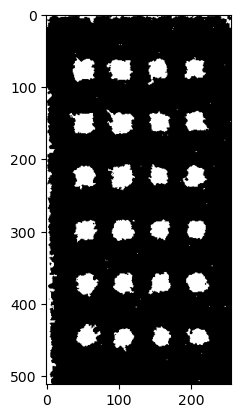

In [49]:
import os
import pathlib
import hyperspy.api as hs
import matplotlib.pyplot as plt
import numpy as np

def absoluteFilePaths(directory):
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
            yield os.path.abspath(os.path.join(dirpath, f))


DATA_DIRECTORY = "/cluster/projects/itea_lille-nv-fys/TFY4330_nanotools/Grp11"

files_with_magnetism = []

dm3 = {}
hdr = {}
mib = {}

for filepath in absoluteFilePaths(DATA_DIRECTORY):
    file = filepath.split("/")[-1].split(".")
    filename, file_extension = file[0], file[-1]

    if file_extension == "mib":
        mib[filename] = filepath
        files_with_magnetism.append(filename)
    elif file_extension == "hdr":
        hdr[filename] = filepath
    elif file_extension == "dm3":
        dm3[filename] = filepath


s = hs.load(dm3["002"])

data = s.data
data_max = np.max(data)
threshold = data_max*0.77

print(np.mean(data < threshold))

data[data<=threshold] = 0
data[data>threshold] = 1

visited = np.zeros(data.shape)


size_threshold = 200

y_length, x_length = data.shape

offsets = [(-1,0), (1,0), (0,-1), (0,1)]


for y in range(y_length):
    for x in range(x_length):
        if data[y,x] == 1 and not visited[y,x]:
            buffer = []

            queue = [(y,x)]
            count = 0

            while queue:
                (y,x) = queue.pop()

                if y >= 0 and y < y_length and x>=0 and x < x_length and not visited[y,x] and data[y,x] == 1:
                    count += 1
                    visited[y,x] = 1

                    buffer.append((y,x))
                    
                    for dy,dx in offsets:
                        queue.append((y+dy,x+dx))

            if count < size_threshold:
                for (y,x) in buffer:
                    data[y,x] = 0
                    
,


plt.imshow(data, cmap='gray', vmin=0, vmax=1)


